In [2]:
!pip3 install numpy matplotlib numba holoviews

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import time
import glob
import matplotlib.image as mpimg
from numba import jit, njit, prange

In [62]:
#Задаём z0 - комплексное число
a = float(input())
b = float(input())
z = complex(a,b)

4
4


In [63]:
zi, zj = 200, 100  # уменьшенная задача
zi_full, zj_full = 8000, 8000  # полная задача
i_min, i_max = -2.5, 1.5
j_min, j_max = -2.5, 1.5

In [66]:
#Считаем количество шагов для нахождения корня
#@njit(parallel = True, fastmath = True)
def newton_root(z0, eps, maxit = 1000):
    """Принимает комплексное число - точку начального приближения, и точность, с которой нужно найти корень  
    sin(z) = 0, возвращает количество итераций, которое потребовалось для нахождения корня"""
    curr_eps = 10000
    lambd = 0
    zn = z0
    it = 0
    while eps < curr_eps:
        zn_prev = zn
        zn = zn - np.sin(zn) / np.cos(zn)
        #print(zn)
        curr_eps = np.abs(zn-zn_prev)
        lambd += 1
        it += 1
        if it >= maxit:
            break
    return lambd

In [67]:
%%time
z = 3 + 1j * 4
newton_root(z, 0.00000001)

CPU times: total: 0 ns
Wall time: 1 ms


8

In [68]:
@njit(parallel = True, fastmath = True)
def newton_roots(xmin, xmax, ymin, ymax, nx, ny, eps, maxit=1000):
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny
    arr = np.empty((ny, nx ), dtype=np.int32)
    for iy in prange(ny):
        for ix in range(nx):
            x = xmin + dx * ix
            y = ymin + dy * iy
            it = newton_root(x + 1j*y, eps, maxit)
            arr[iy, ix] = it
    return arr

In [60]:
newton_roots(i_min, i_max, j_min, j_max, zi, zj, 0.00001)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'newton_root':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "AppData\Local\Temp\ipykernel_19044\1213253385.py", line 10:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

In [69]:
#Считаем количество шагов для нахождения корня
def newton_root(z0, eps):
    """Принимает комплексное число - точку начального приближения, и точность, с которой нужно найти корень  
    sin(z) = 0, возвращает количество итераций, которое потребовалось для нахождения корня"""
    curr_eps = 10000
    lambd = 0
    zn = z0
    while eps < curr_eps:
        zn_prev = zn
        zn = zn - np.sin(zn) / np.cos(zn)
        #print(zn)
        curr_eps = np.abs(zn-zn_prev)
        lambd += 1
    return lambd
    

In [70]:
print(newton_root.__doc__)
newton_root(z, 0.000001)

Принимает комплексное число - точку начального приближения, и точность, с которой нужно найти корень  
    sin(z) = 0, возвращает количество итераций, которое потребовалось для нахождения корня


7

In [71]:
#Создаём сетку. Первый элемент содержит 
arr_real = np.linspace(-3, 3, 2000)
arr_imaginary = np.linspace(-3, 3, 2000)
arr_complex = np.vstack([arr_real,arr_imaginary])
len(arr_complex[0])

2000

In [75]:
@nb.njit(parallel = True)
def newton_roots(z_real, z_im, eps):
    lambdas = np.empty((len(z_real),len(z_im)), dtype=np.int32)
    for i in nb.prange(len(z_real)):
        for j in range(len(z_im)):
            z = complex(z_real[i], z_im[j])
            curr_eps = 10000000
            lambd = 0
            zn = z
            while eps < curr_eps:
                zn_prev = zn
                zn = zn - np.sin(zn) / np.cos(zn)
                curr_eps = np.abs(zn-zn_prev)
                lambd += 1
            lambdas[i,j] = lambd
    return lambdas
        

In [76]:
r = newton_roots(arr_real, arr_imaginary, 0.00001)
r

array([[6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

In [74]:
A, B = np.meshgrid(arr_real, arr_imaginary)

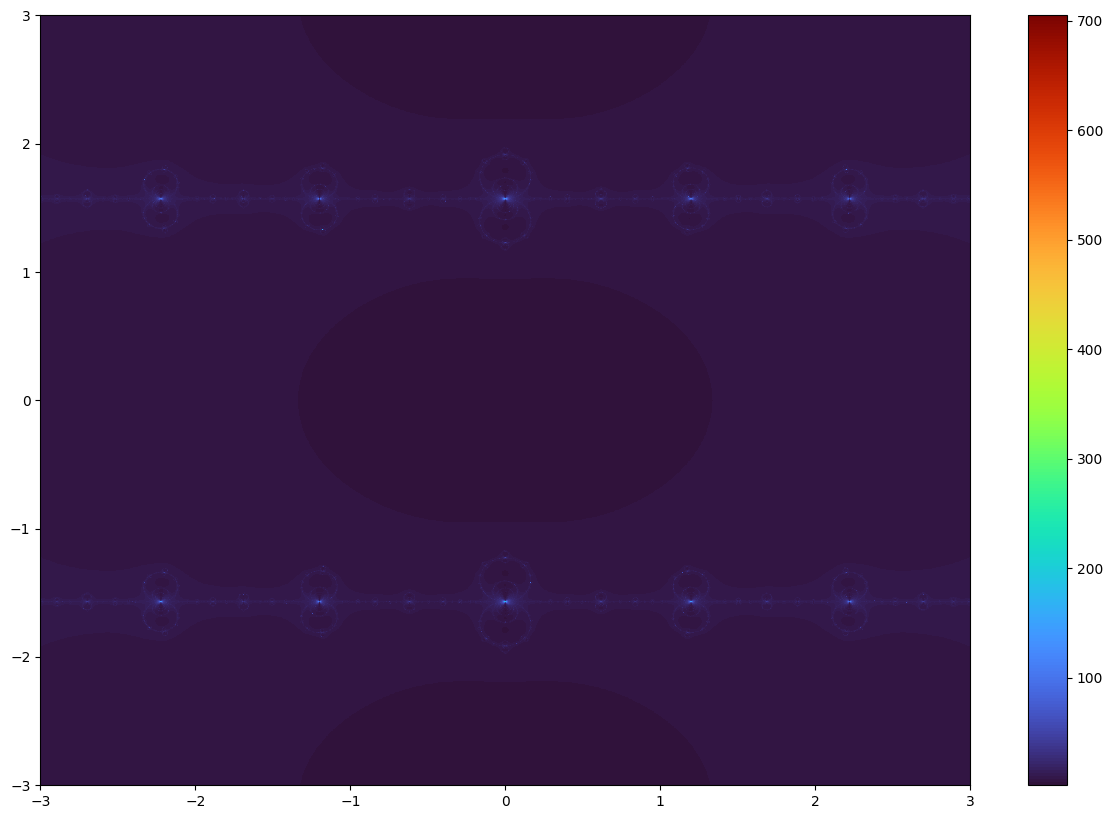

In [19]:
#gist_stern
plt.figure(figsize=(15,10))
plt.pcolormesh(A, B, r, cmap = 'turbo')
plt.colorbar()
plt.show()